<a href="https://colab.research.google.com/github/Xuli2317/DSI204-project/blob/main/DSI204_California_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!mkdir ~/.kaggle
!echo '{"username":"xuli","key":"f2cba47eb629752421f72182e50be7df"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

In [ ]:
!kaggle datasets download camnugent/california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 66.6MB/s]


In [ ]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [ ]:
data = pd.read_csv('housing.csv')
orgDATA = pd.DataFrame(data)
display(orgDATA)
df = orgDATA.copy()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Description

มี 10 columns
1. **longitude**: A measure of how far west a house is; a higher value is farther west
2. **latitude**: A measure of how far north a house is; a higher value is farther north
3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building
4. **totalRooms**: Total number of rooms within a block
5. **totalBedrooms**: Total number of bedrooms within a block
6. **population**: Total number of people residing within a block
7. **households**: Total number of households, a group of people residing within a home unit, for a block
8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars)
10. **oceanProximity**: Location of the house w.r.t ocean/sea



ดู column ที่มีชื่อว่า ocean_proximity ที่มีลักษณะข้อมูลเป็น categorical

In [ ]:
df.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


พบว่ามี unique อยู่ 5 ค่า ได้แก่ \
<1H OCEAN - พื้นที่ที่อยู่ห่างจากมหาสมุทรไม่เกิน 1 ชั่วโมง \
INLAND - พื้นที่ที่อยู่ลึกเข้าไปในแผ่นดิน (ไม่ติดมหาสมุทร) \
NEAR OCEAN - พื้นที่ใกล้มหาสมุทร (แต่ไม่ถึง 1 ชั่วโมง) \
NEAR BAY - พื้นที่ใกล้อ่าว \
ISLAND - พื้นที่บนเกาะ

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## แสดง Bar chart ดูจำนวนของแต่ละ unique

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: proportion, dtype: float64


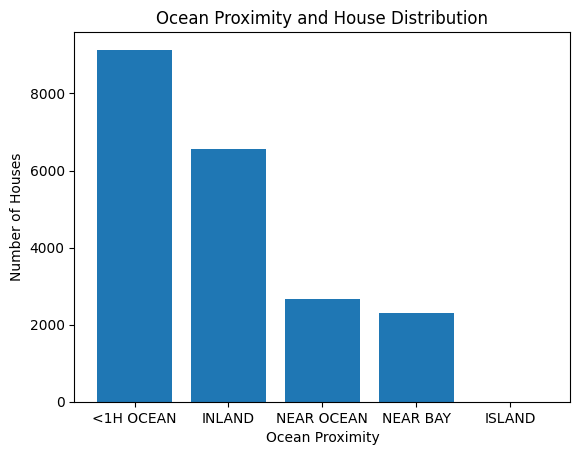

In [ ]:
df_col = df['ocean_proximity']
x = df_col.value_counts()
print(x)
y = df_col.value_counts(normalize=True)
print(y)

plt.xlabel('Ocean Proximity')
plt.ylabel('Number of Houses')
plt.title('Ocean Proximity and House Distribution')

plt.bar(x.index, x)
plt.show()

#add Label

# สถิติเชิงพรรณนา (Descriptive statistics)

ใช้การวัดตำแหน่งของข้อมูล เพื่อทำการตัด outliers

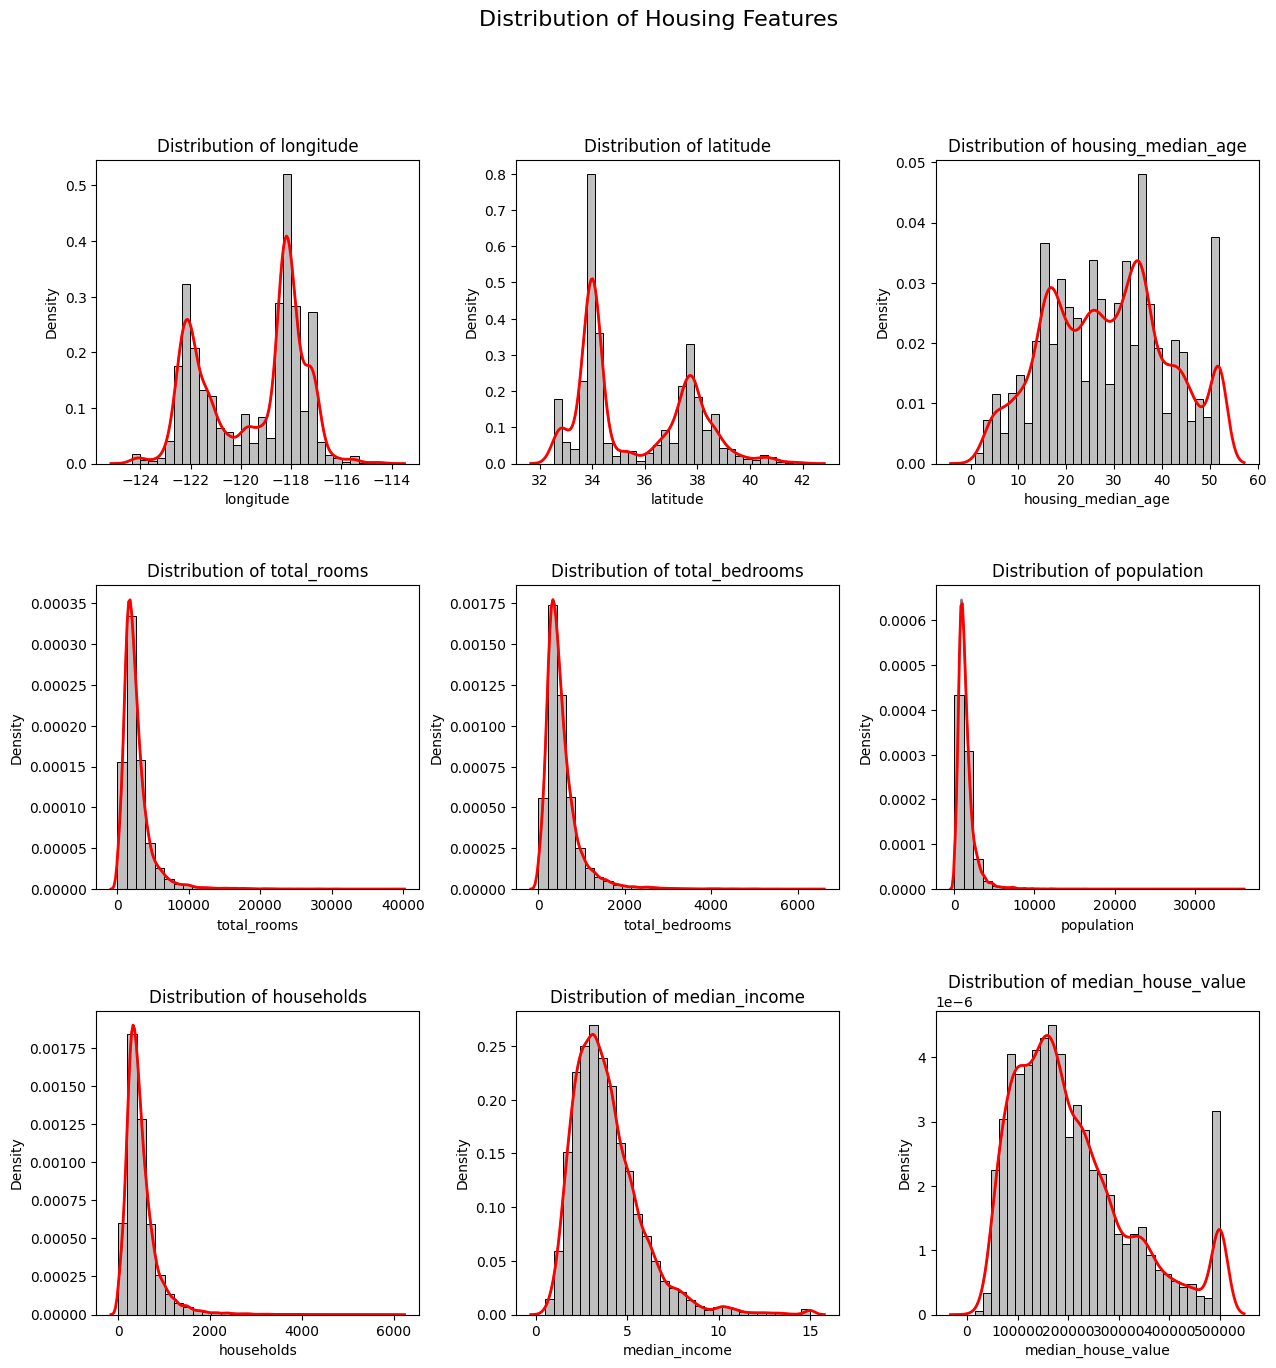

In [ ]:
# ตั้งค่าขนาดและการจัดการ subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 แถว 3 คอลัมน์
axes = axes.flatten()  # แปลง axes เป็น list
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # ปรับช่องว่างระหว่าง subplot

# เลือกคอลัมน์ตัวเลขสำหรับการพล็อต
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns

# วนลูปพล็อต histogram และ KDE
for ax, col in zip(axes, numeric_columns):
    sns.histplot(df[col].dropna(), kde=True, stat="density", ax=ax, color="gray", bins=30)
    sns.kdeplot(df[col].dropna(), ax=ax, color="red", lw=2)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")

fig.suptitle('Distribution of Housing Features', fontsize=16)
plt.show()

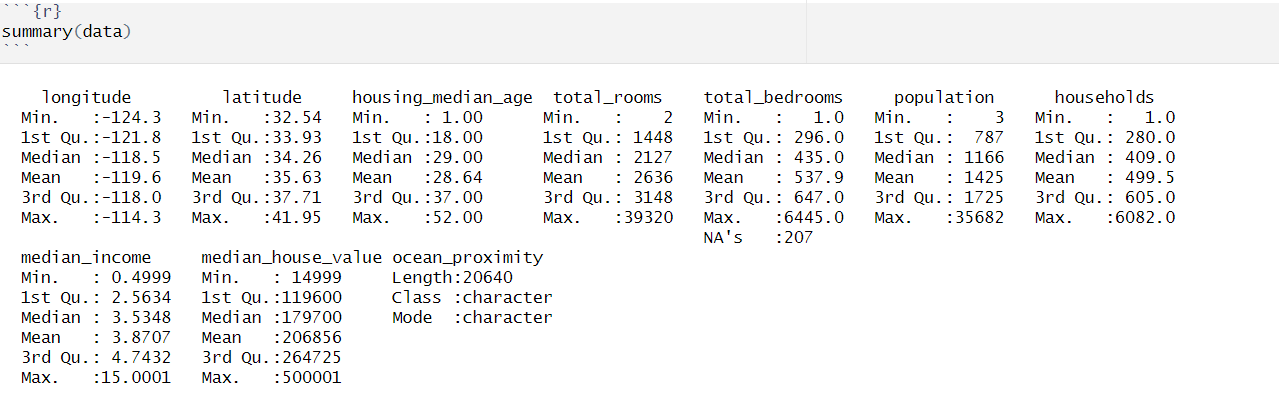

In [ ]:
summary = df.describe(include='all')  # รวมทั้งตัวเลขและข้อมูลประเภทอื่น
print(summary)

           longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000 

In [ ]:
columns=df.select_dtypes(include=['number'])

## ดู outliers ของแต่ละ columns

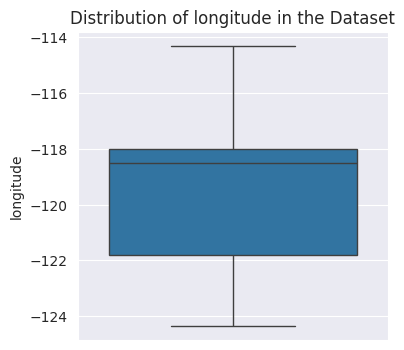

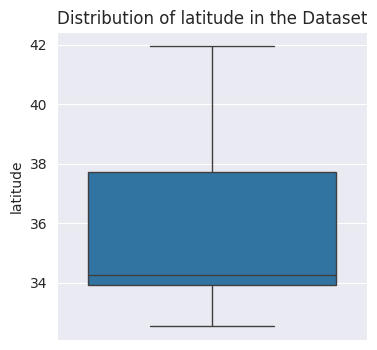

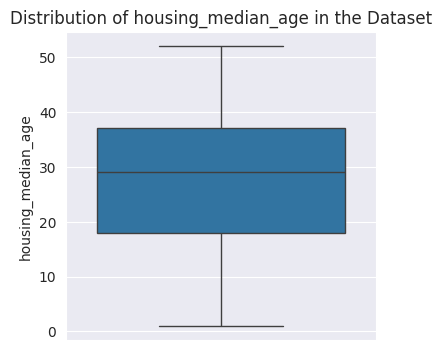

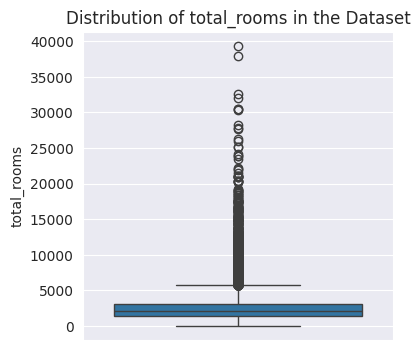

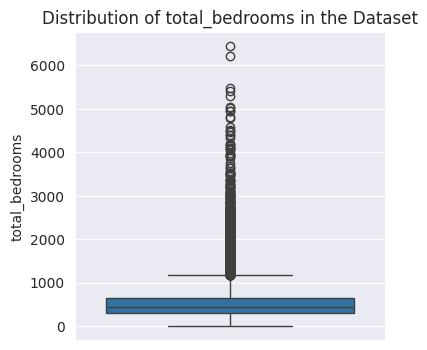

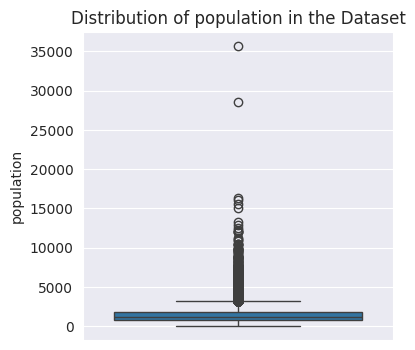

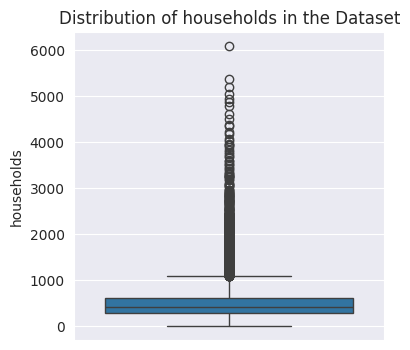

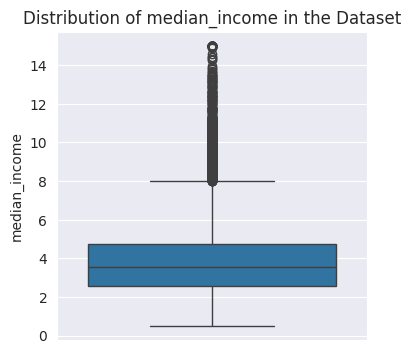

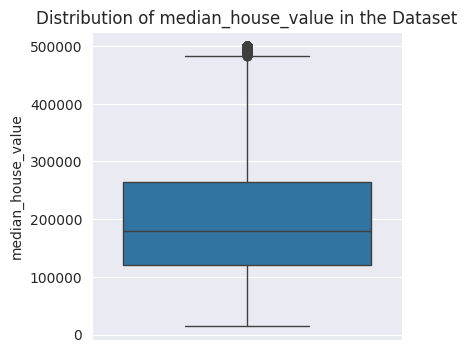

In [ ]:
for col in columns:
    plt.figure(figsize=(4,4))
    sns.set_style('darkgrid')
    sns.boxplot(df,y=col)
    plt.title(f'Distribution of {col} in the Dataset')
    plt.show()

In [ ]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


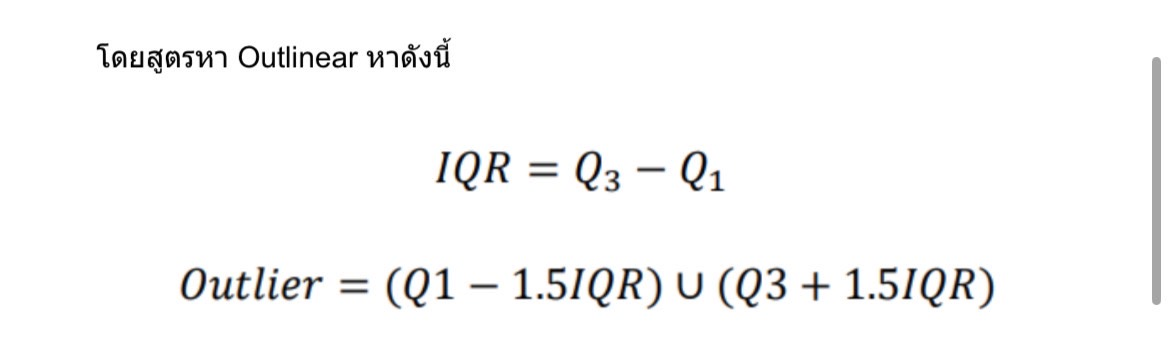

In [ ]:
columns=df.drop(columns=['ocean_proximity']).columns.to_list()
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

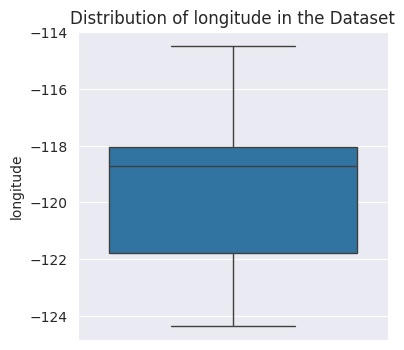

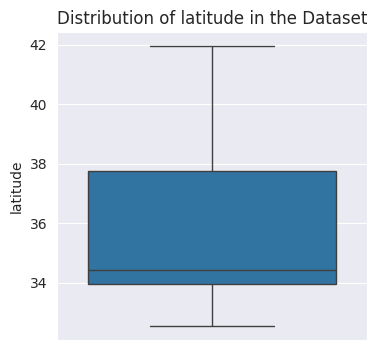

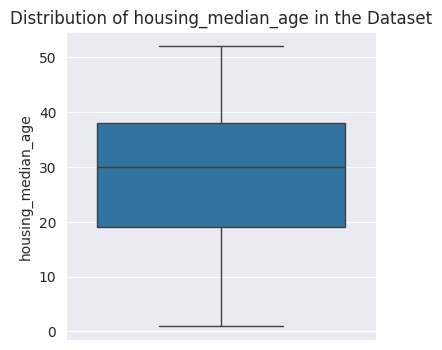

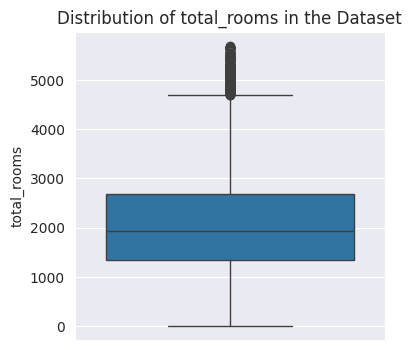

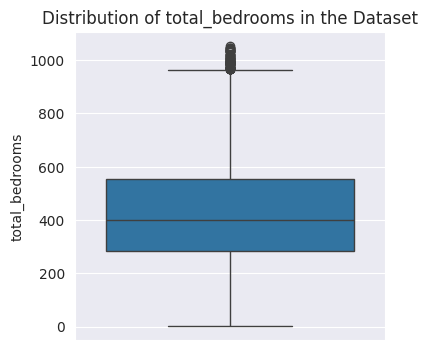

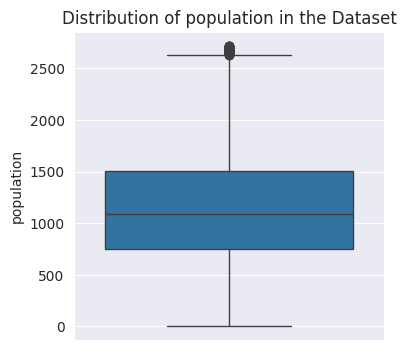

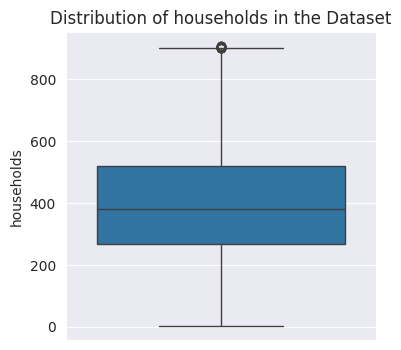

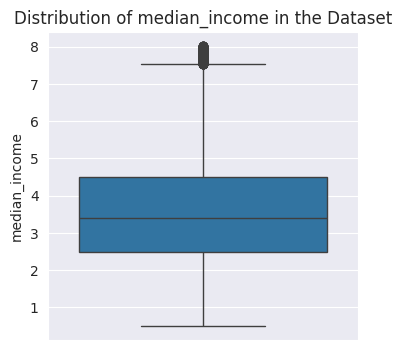

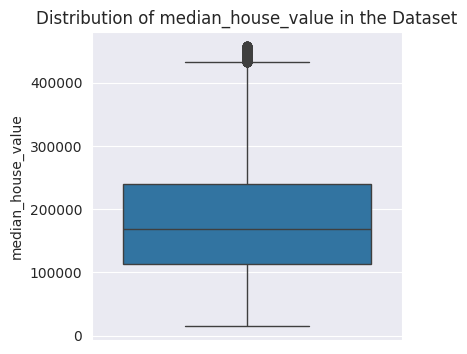

In [ ]:
for col in columns:
    plt.figure(figsize=(4,4))
    sns.set_style('darkgrid')
    sns.boxplot(df,y=col)
    plt.title(f'Distribution of {col} in the Dataset')
    plt.show()

จะเหลือจำนวน rows และ columns หลังจากตัด outliers ดังนี้

In [ ]:
df.shape

(16725, 10)

## พล็อตกราฟดูค่า Distribution ของแต่ละ columns หลังจากตัด outliers

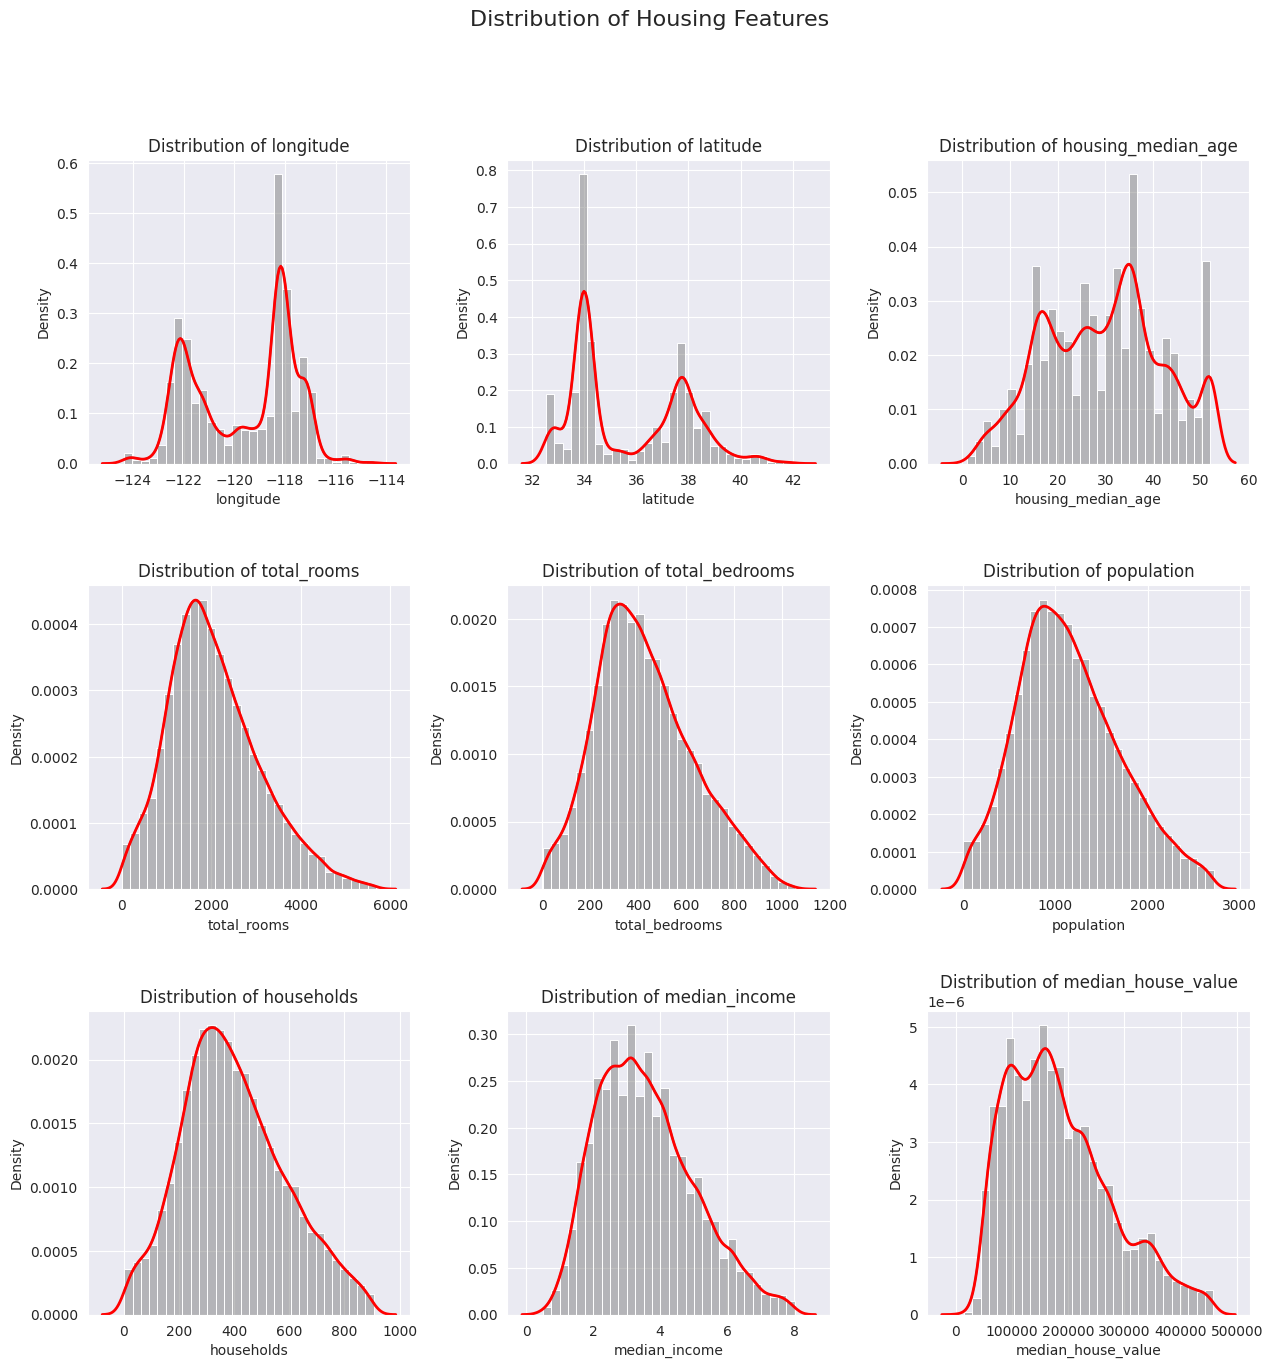

In [ ]:
# ตั้งค่าขนาดและการจัดการ subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 แถว 3 คอลัมน์
axes = axes.flatten()  # แปลง axes เป็น list
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # ปรับช่องว่างระหว่าง subplot

# เลือกคอลัมน์ตัวเลขสำหรับการพล็อต
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns

# วนลูปพล็อต histogram และ KDE
for ax, col in zip(axes, numeric_columns):
    sns.histplot(df[col].dropna(), kde=True, stat="density", ax=ax, color="gray", bins=30)
    sns.kdeplot(df[col].dropna(), ax=ax, color="red", lw=2)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")

fig.suptitle('Distribution of Housing Features', fontsize=16)
plt.show()

จะเห็นได้ว่ากราฟของ columns ที่มีการตัดค่า outliers มีการเปลี่ยนแปลงไปเริ่มเข้าสู่การเป็น Normal distribution มากขึ้น

In [ ]:
summary = df.describe(include='all')  # รวมทั้งตัวเลขและข้อมูลประเภทอื่น
print(summary)

           longitude      latitude  housing_median_age   total_rooms  \
count   16725.000000  16725.000000        16725.000000  16725.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.615230     35.716213           29.656622   2071.818296   
std         2.005515      2.173725           12.218930   1024.143588   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.790000     33.940000           19.000000   1348.000000   
50%      -118.710000     34.410000           30.000000   1932.000000   
75%      -118.030000     37.750000           38.000000   2685.000000   
max      -114.490000     41.950000           52.000000   5688.000000   

        total_bedrooms    population    households  median_income  \
count     16725.000000  16725.000000  16725.000000   16725.000000 

จะเห็นได้ว่า ค่า Mean และค่า STD. มีการลดน้อยลงจากก่อนที่จะตัด Outliers

## ดำเนินการทำ One-hot encode
ใน column ที่มีชื่อว่า ocean_proximity เพราะเป็น categorical

In [ ]:
# First I find all object cols
cat_col = df.select_dtypes('object').columns.to_list()
cat_col

['ocean_proximity']

In [ ]:
cat_housing = pd.get_dummies(df['ocean_proximity'])
cat_housing = cat_housing.astype(int)
cat_housing.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0


In [ ]:
drops = ['ocean_proximity']

# ลบคอลัมน์จาก DataFrame
df = df.drop(columns=drops)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0


In [ ]:
df = pd.concat([df, cat_housing], axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


columns จะเพิ่มขึ้นกลายเป็น 14 columns

---



# ใช้ Heatmap ดูความสัมพันธ์ของแต่ละ columns

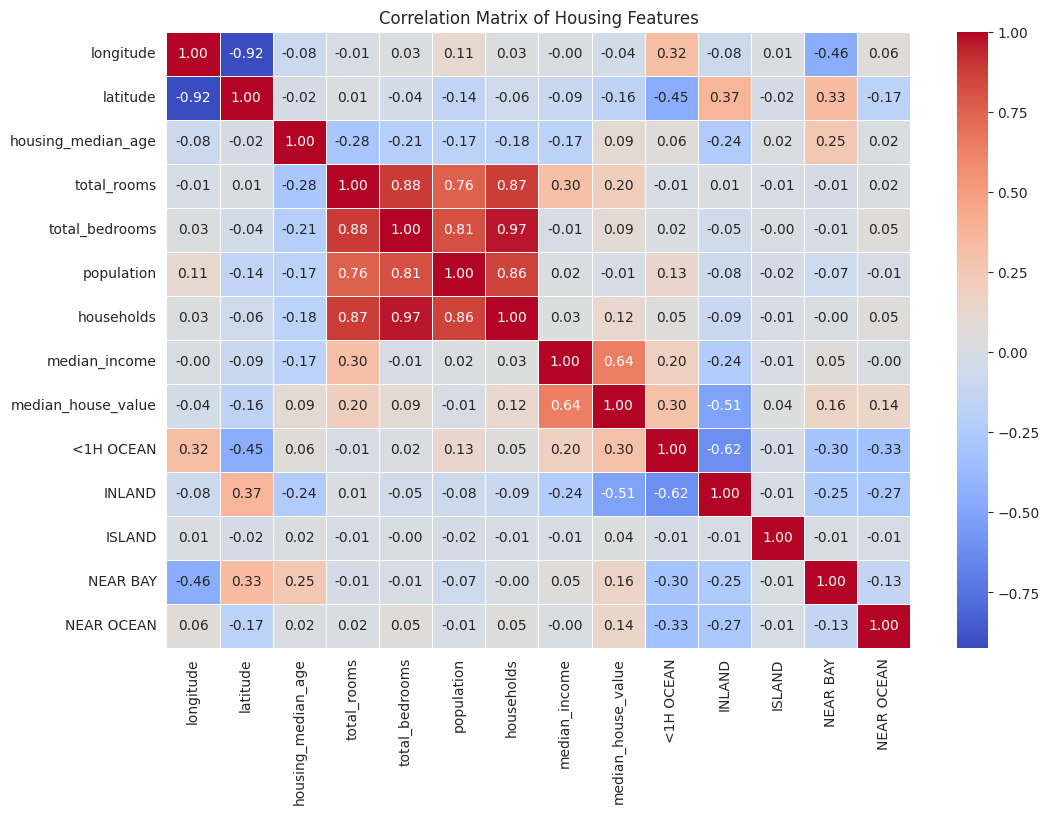

In [ ]:
corr_matrix = df.corr(method = "pearson")

# สร้าง heatmap ของ correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# ตั้งชื่อกราฟ
plt.title('Correlation Matrix of Housing Features')
plt.show()

# **สถิติเชิงอนุมาน (Inferential statistics)**

Hypothesis testing ใช้ t-test เทียบ 2 ตัวแปร

## **หาความสัมพันธ์ระหว่าง median_house_value และ median_income**
ตัวแปรที่เลือกใช้ได้แก่ **median_house_value** และ **median_income** \\
กำหนดให้ **x** คือตัวแปรของ **median_income** และ **y** คือตัวแปรของ **median_house_value** \\
ในการทดสอบความสัมพันธ์ระหว่าง x กับ y กล่าวคือ

> เมื่อ median_income มีการเปลี่ยนแปลง จะส่งผลกระทบต่อ median_house_value หรือไม่


In [ ]:
from scipy.stats import ttest_ind
import scipy.stats as stats

# สุ่มตัวอย่างข้อมูล 30 แถว
sample_data = df.sample(30, random_state=123)

# ทำ Two-Sample t-test
x = sample_data['median_house_value']
y = sample_data['median_income']

# คำนวณค่า t-test
t_stat, p_value = ttest_ind(x, y, equal_var=True)

# คำนวณค่า Confidence Interval (95%)
mean_diff = np.mean(x) - np.mean(y)
n_x, n_y = len(x), len(y)
pooled_std = np.sqrt(((n_x - 1) * np.var(x, ddof=1) + (n_y - 1) * np.var(y, ddof=1)) / (n_x + n_y - 2))
ci_low = mean_diff - stats.t.ppf(0.975, df=n_x + n_y - 2) * pooled_std * np.sqrt(1 / n_x + 1 / n_y)
ci_high = mean_diff + stats.t.ppf(0.975, df=n_x + n_y - 2) * pooled_std * np.sqrt(1 / n_x + 1 / n_y)

# แสดงผลลัพธ์
print("Two-Sample t-test:")
print(f"data: median_house_value and total_rooms")
print(f"t = {t_stat:.3f}, df = {n_x + n_y - 2}, p-value = {p_value:.3e}")
print("alternative hypothesis: true difference in means is not equal to 0")
print(f"95 percent confidence interval: {ci_low:.1f} {ci_high:.1f}")
print("sample estimates:")
print(f" mean of x = {np.mean(x):.3f}")
print(f" mean of y = {np.mean(y):.3f}")

Two-Sample t-test:
data: median_house_value and total_rooms
t = 10.687, df = 58, p-value = 2.493e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval: 138405.9 202200.0
sample estimates:
 mean of x = 170306.667
 mean of y = 3.712


จากการกำหนดกลุ่มตัวอย่างมา 30 rows ผลการคำนวณได้คำตอบคือ ค่า p-value < alpha จึงปฎิเสธสมมติฐานว่าง หรือก็คือยอมรับสมมติฐานทางเลือกที่ว่า beta ไม่เท่ากับ 0 ความชันไม่เท่ากับ 0 บ่งบอกได้ว่าตัวแปรทั้งสองมีความสัมพันธ์กัน


> ดังนั้น median_income จะส่งผลกับ median_house_value อย่างมีนัยสำคัญ


---





### สร้าง Scatter plot เพื่อดู Regression (การถดถอย)

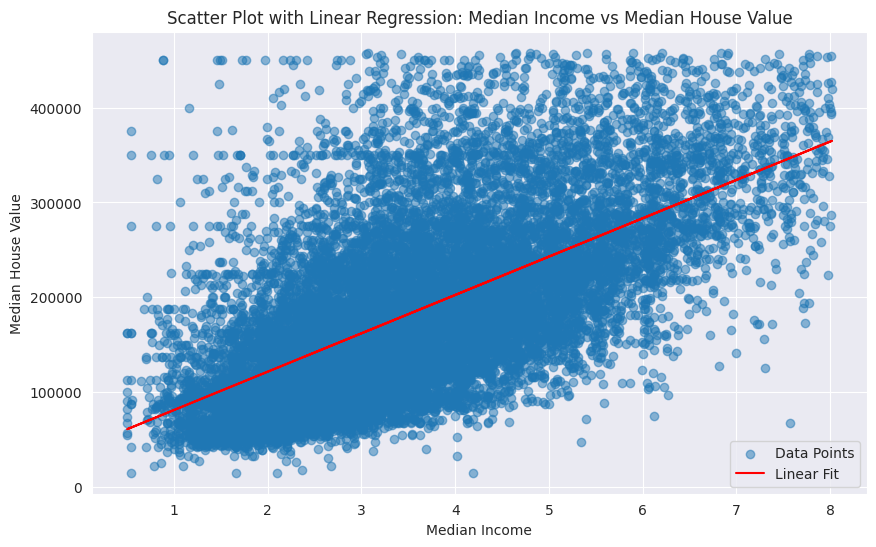

In [ ]:
X = df['median_income']
Y = df['median_house_value']

# คำนวณค่าสัมประสิทธิ์ (slope) และจุดตัด (intercept) โดยใช้ numpy
slope, intercept = np.polyfit(X, Y, 1)  # 1 คือการถดถอยเชิงเส้น

# สร้างเส้น regression line โดยใช้ค่าที่คำนวณได้
y_pred = slope * X + intercept

# สร้าง scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X, Y, alpha=0.5, label='Data Points')

# วาดเส้น Linear Regression
plt.plot(X, y_pred, color='red', label='Linear Fit')

# เพิ่มชื่อให้กับแกน x และ y
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

# เพิ่มชื่อกราฟ
plt.title('Scatter Plot with Linear Regression: Median Income vs Median House Value')

# เพิ่มคำอธิบาย
plt.legend()

# แสดงกราฟ
plt.show()

## **หาความสัมพันธ์ระหว่าง median_house_value และ total_rooms**
ตัวแปรที่เลือกใช้ได้แก่ **median_house_value** และ **total_rooms** \\
กำหนดให้ **x** คือตัวแปรของ **total_rooms** และ **y** คือตัวแปรของ **median_house_value** \\
ในการทดสอบความสัมพันธ์ระหว่าง x กับ y กล่าวคือ

> เมื่อ total_rooms มีการเปลี่ยนแปลง จะส่งผลกระทบต่อ median_house_value หรือไม่



In [ ]:
from scipy.stats import ttest_ind
import scipy.stats as stats

# สุ่มตัวอย่างข้อมูล 30 แถว
sample_data = df.sample(30, random_state=123)

# ทำ Two-Sample t-test
x = sample_data['median_house_value']
y = sample_data['total_rooms']

# คำนวณค่า t-test
t_stat, p_value = ttest_ind(x, y, equal_var=True)

# คำนวณค่า Confidence Interval (95%)
mean_diff = np.mean(x) - np.mean(y)
n_x, n_y = len(x), len(y)
pooled_std = np.sqrt(((n_x - 1) * np.var(x, ddof=1) + (n_y - 1) * np.var(y, ddof=1)) / (n_x + n_y - 2))
ci_low = mean_diff - stats.t.ppf(0.975, df=n_x + n_y - 2) * pooled_std * np.sqrt(1 / n_x + 1 / n_y)
ci_high = mean_diff + stats.t.ppf(0.975, df=n_x + n_y - 2) * pooled_std * np.sqrt(1 / n_x + 1 / n_y)

# แสดงผลลัพธ์
print("Two-Sample t-test:")
print(f"data: median_house_value and total_rooms")
print(f"t = {t_stat:.3f}, df = {n_x + n_y - 2}, p-value = {p_value:.3e}")
print("alternative hypothesis: true difference in means is not equal to 0")
print(f"95 percent confidence interval: {ci_low:.1f} {ci_high:.1f}")
print("sample estimates:")
print(f" mean of x = {np.mean(x):.3f}")
print(f" mean of y = {np.mean(y):.3f}")

Two-Sample t-test:
data: median_house_value and total_rooms
t = 10.567, df = 58, p-value = 3.862e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval: 136497.8 200296.4
sample estimates:
 mean of x = 170306.667
 mean of y = 1909.567


จากการกำหนดกลุ่มตัวอย่างมา 30 rows ผลการคำนวณได้คำตอบคือ ค่า p-value < alpha จึงปฎิเสธสมมติฐานว่าง หรือก็คือยอมรับสมมติฐานทางเลือกที่ว่า beta ไม่เท่ากับ 0 ความชันไม่เท่ากับ 0 บ่งบอกได้ว่าตัวแปรทั้งสองมีความสัมพันธ์กัน


> ดังนั้น total_rooms จะส่งผลกับ median_house_value อย่างมีนัยสำคัญ


---

### สร้าง Scatter plot เพื่อดู Regression (การถดถอย)

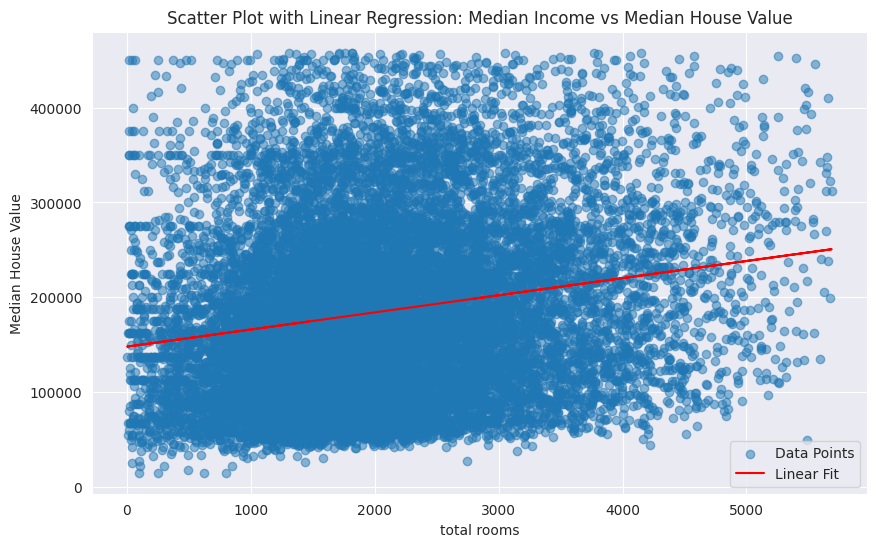

In [ ]:
X = df['total_rooms']
Y = df['median_house_value']

# คำนวณค่าสัมประสิทธิ์ (slope) และจุดตัด (intercept) โดยใช้ numpy
slope, intercept = np.polyfit(X, Y, 1)  # 1 คือการถดถอยเชิงเส้น

# สร้างเส้น regression line โดยใช้ค่าที่คำนวณได้
y_pred = slope * X + intercept

# สร้าง scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X, Y, alpha=0.5, label='Data Points')

# วาดเส้น Linear Regression
plt.plot(X, y_pred, color='red', label='Linear Fit')

# เพิ่มชื่อให้กับแกน x และ y
plt.xlabel('total rooms')
plt.ylabel('Median House Value')

# เพิ่มชื่อกราฟ
plt.title('Scatter Plot with Linear Regression: Median Income vs Median House Value')

# เพิ่มคำอธิบาย
plt.legend()

# แสดงกราฟ
plt.show()